Dense NN

X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)
Epoch 1/20


c:\Users\jing5\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\jing5\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.5808 - loss: 1.2367 - val_accuracy: 0.9470 - val_loss: 0.1759
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8406 - loss: 0.5241 - val_accuracy: 0.9587 - val_loss: 0.1435
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8715 - loss: 0.4317 - val_accuracy: 0.9630 - val_loss: 0.1198
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8814 - loss: 0.3897 - val_accuracy: 0.9685 - val_loss: 0.0985
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8916 - loss: 0.3596 - val_accuracy: 0.9657 - val_loss: 0.1100
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8972 - loss: 0.3480 - val_accuracy: 0.9694 - val_loss: 0.0992
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9018 - loss: 0.3269 - val_accuracy: 0.9712 - val_loss: 0.0915
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9051 - loss: 0.3233 - val

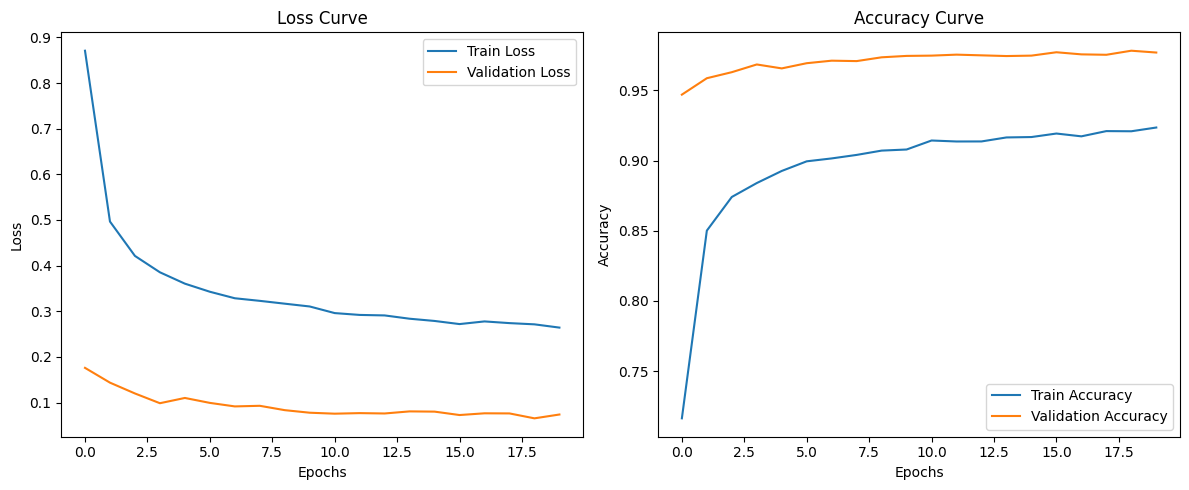

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. 加載 MNIST 數據集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 正規化數據到 [0,1] 範圍
X_train, X_test = X_train / 255.0, X_test / 255.0

# 增加通道維度，使數據形狀為 (batch_size, 28, 28, 1)
X_train = X_train[..., np.newaxis]  # shape (60000, 28, 28, 1)
X_test = X_test[..., np.newaxis]    # shape (10000, 28, 28, 1)

# 檢查數據形狀
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

# 將標籤進行 One-hot 編碼
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 2. 定義數據增強
datagen = ImageDataGenerator(
    rotation_range=10,       # 隨機旋轉角度
    width_shift_range=0.1,   # 隨機水平平移
    height_shift_range=0.1,  # 隨機垂直平移
    zoom_range=0.1           # 隨機縮放
)
datagen.fit(X_train)

# 3. 定義優化後的 Dense NN 模型
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(256, activation='relu'),  # 第一層隱藏層，256 個神經元
    Dropout(0.5),                   # Dropout 正則化
    Dense(128, activation='relu'),  # 第二層隱藏層，128 個神經元
    Dropout(0.5),                   # Dropout 正則化
    Dense(10, activation='softmax') # 輸出層，10 個類別
])

# 4. 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. 訓練模型
# 這裡移除了 steps_per_epoch，Keras 會自動計算
history = model.fit(datagen.flow(X_train, y_train, batch_size=32, shuffle=True),
                    validation_data=(X_test, y_test),
                    epochs=20)

# 6. 評估模型
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# 7. 可視化損失和準確率
plt.figure(figsize=(12, 5))

# 損失曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 準確率曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

CNN

Epoch 1/20


c:\Users\jing5\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\jing5\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.7679 - loss: 0.7033 - val_accuracy: 0.9852 - val_loss: 0.0433
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9485 - loss: 0.1729 - val_accuracy: 0.9850 - val_loss: 0.0428
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9630 - loss: 0.1210 - val_accuracy: 0.9912 - val_loss: 0.0275
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9688 - loss: 0.1041 - val_accuracy: 0.9920 - val_loss: 0.0239
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9723 - loss: 0.0956 - val_accuracy: 0.9941 - val_loss: 0.0175
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9747 - loss: 0.0856 - val_accuracy: 0.9933 - val_loss: 0.0185
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.9784 - loss: 0.0731 - val_accuracy: 0.9920 - val_loss: 0.0237
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9795 - loss: 0.0711 -

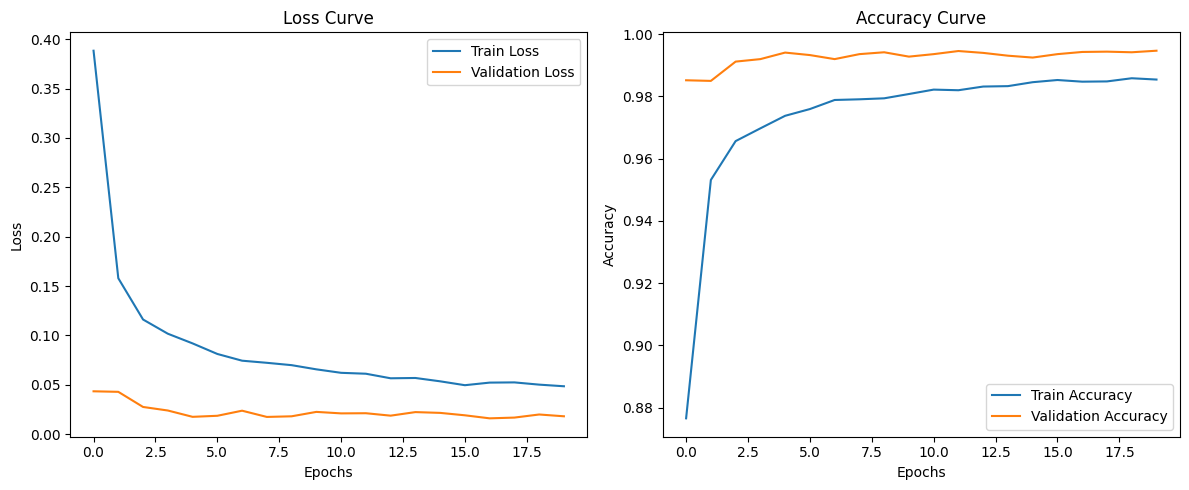

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 1. 加載 MNIST 數據集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 正規化數據到 [0,1] 範圍
X_train, X_test = X_train / 255.0, X_test / 255.0

# 增加通道維度，使數據形狀為 (batch_size, 28, 28, 1)
X_train = X_train[..., np.newaxis]  # shape (60000, 28, 28, 1)
X_test = X_test[..., np.newaxis]    # shape (10000, 28, 28, 1)

# 將標籤進行 One-hot 編碼
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# 2. 定義數據增強
datagen = ImageDataGenerator(
    rotation_range=10,       # 隨機旋轉角度
    width_shift_range=0.1,   # 隨機水平平移
    height_shift_range=0.1,  # 隨機垂直平移
    zoom_range=0.1           # 隨機縮放
)
datagen.fit(X_train)

# 3. 定義 CNN 模型
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # 第一個卷積層
    MaxPooling2D(pool_size=(2, 2)),                                 # 最大池化
    Conv2D(64, (3, 3), activation='relu'),                          # 第二個卷積層
    MaxPooling2D(pool_size=(2, 2)),                                 # 最大池化
    Flatten(),                                                     # 展平層
    Dense(128, activation='relu'),                                 # 全連接層
    Dropout(0.5),                                                  # Dropout 正則化
    Dense(10, activation='softmax')                                # 輸出層
])

# 4. 編譯模型
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. 訓練模型
history = model.fit(datagen.flow(X_train, y_train, batch_size=32, shuffle=True),
                    validation_data=(X_test, y_test),
                    epochs=20)

# 6. 評估模型
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

# 7. 可視化損失和準確率
plt.figure(figsize=(12, 5))

# 損失曲線
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 準確率曲線
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()